In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data=pd.read_csv('creditcard.csv')

## Task 1

#### Objective : Given a datapoint(transaction) classify whether a transaction is fraud or not.

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.shape

(284807, 31)

In [6]:
data['Class'].unique()

array([0, 1])

In [7]:
data['Class'].nunique()

2

In [8]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

#### Basic info about creditcard data set:

1.no of features=30

2.no of class=2,class 0 (not fraud) and class 1 (fraud)

3.no of datapoints/observation =284807

4.no of datapoint labeled 0 =284315

5.no of datapoint labeled 1=492

Thus, it's a unbalanced dataset.


In [9]:
data.isnull().sum() #no missing values 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
data.info() # getting basic info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

### Performing Univariate Analysis

#### Lets start univariate analysis by ploting PDF for each of the feature:

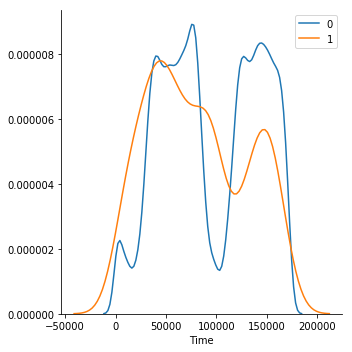

In [11]:
fg=sns.FacetGrid(data=data,hue='Class',size=5)
fg.map(sns.kdeplot,'Time')
plt.legend()

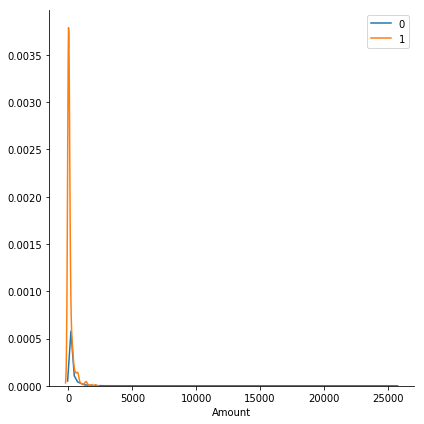

In [12]:
fg=sns.FacetGrid(data=data,hue='Class',size=6)
fg.map(sns.kdeplot,'Amount')
plt.legend()

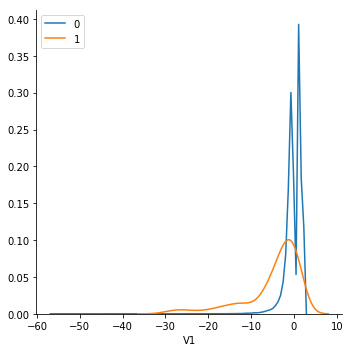

In [13]:
fg=sns.FacetGrid(data=data,hue='Class',size=5)
fg.map(sns.kdeplot,'V1')
plt.legend()

/opt/conda/envs/py3.6/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


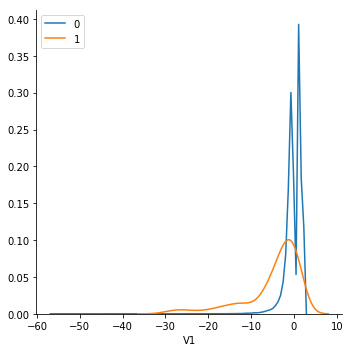

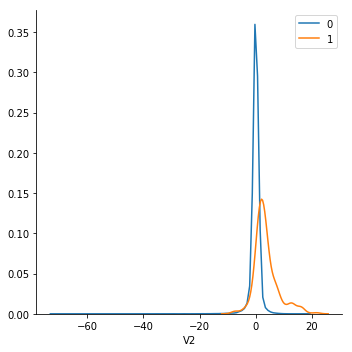

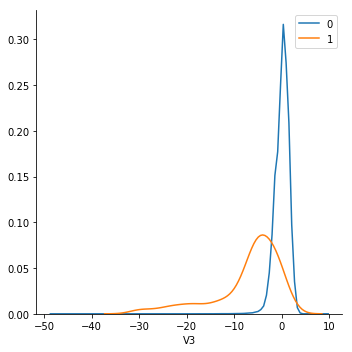

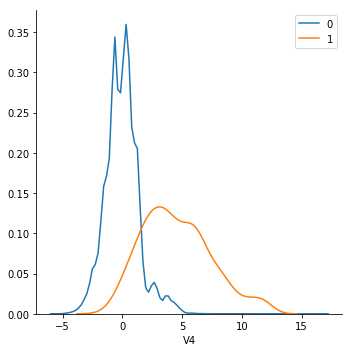

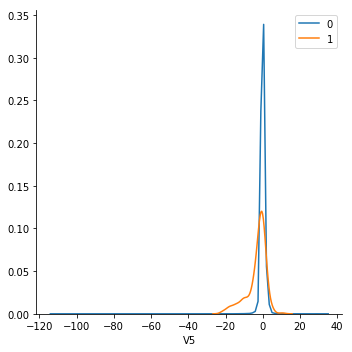

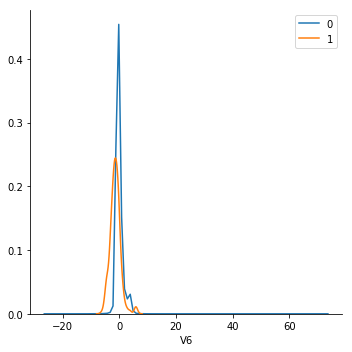

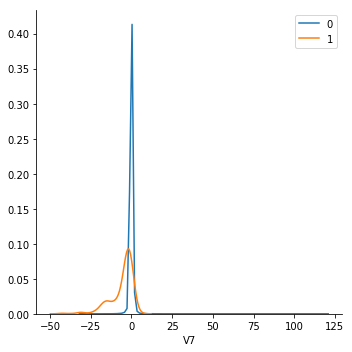

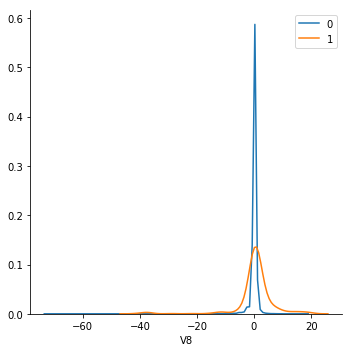

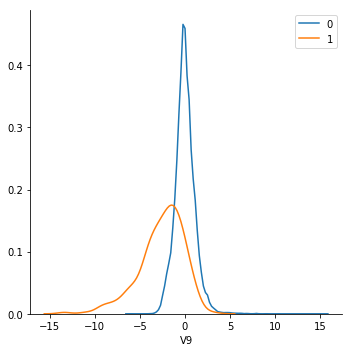

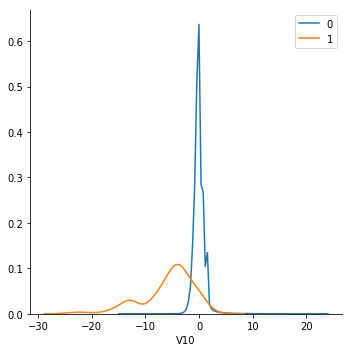

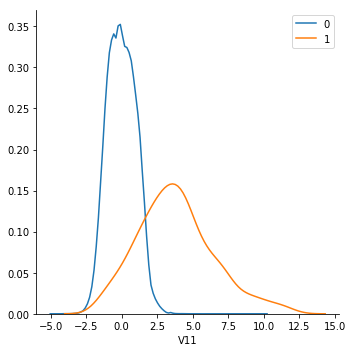

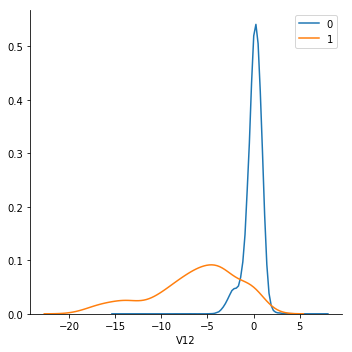

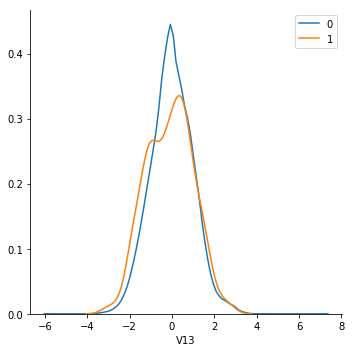

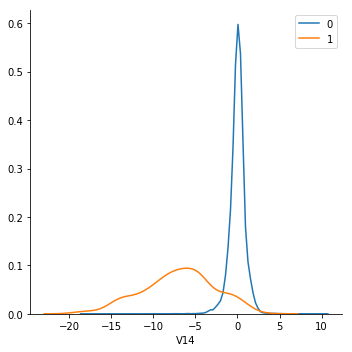

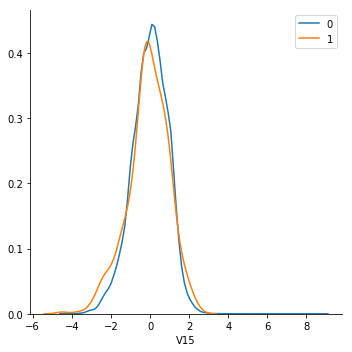

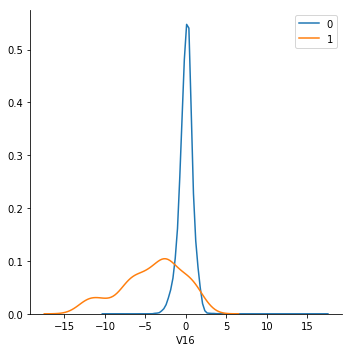

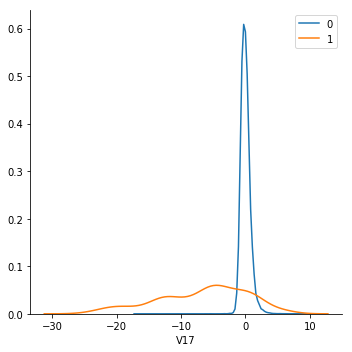

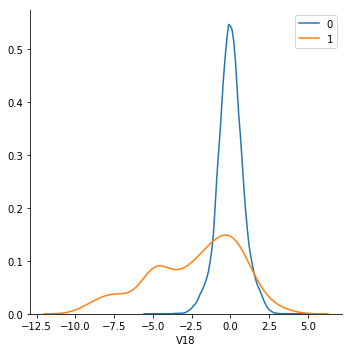

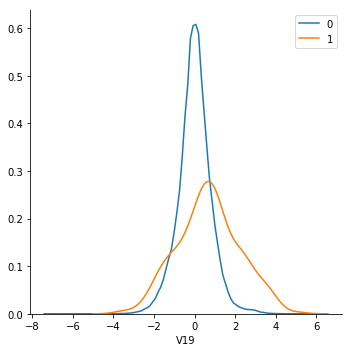

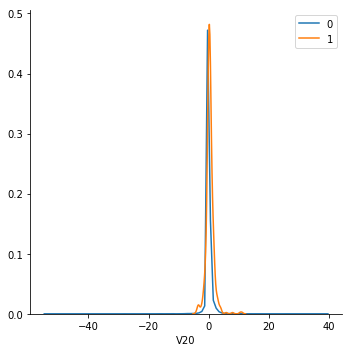

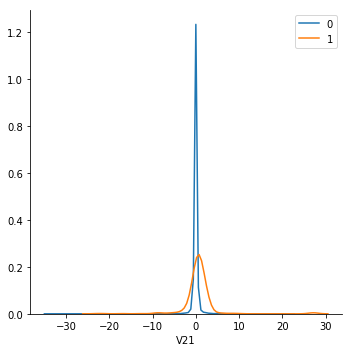

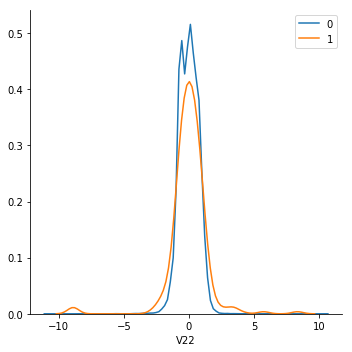

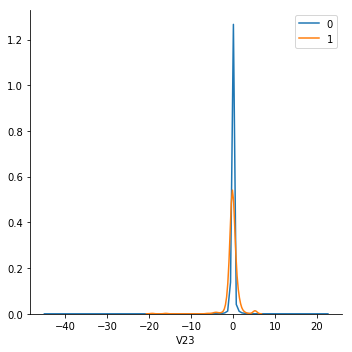

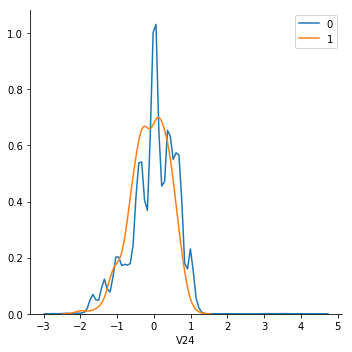

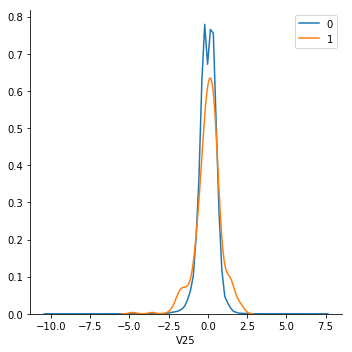

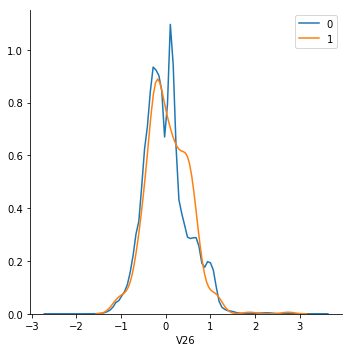

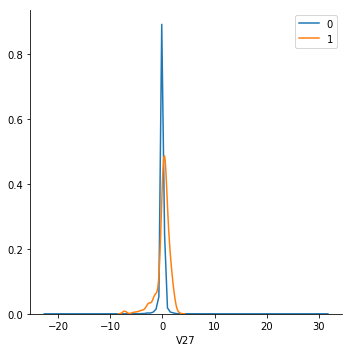

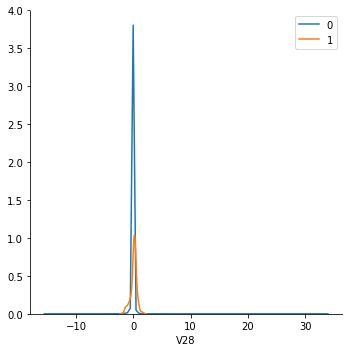

In [14]:
for i in range(1,29):
    fg=sns.FacetGrid(data=data,hue='Class',size=5)
    fg.map(sns.kdeplot,'V{}'.format(i))
    plt.legend()

##### Conclusion of pdf :we saw for each feature both classes are overlapping and almost fraud and non fraud are insepreable, we can verify by ploting box plot 

#### let's move further with box plot :

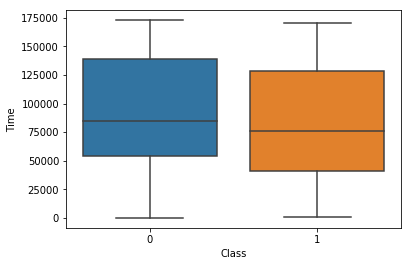

In [15]:
sns.boxplot(x='Class',y='Time',data=data)


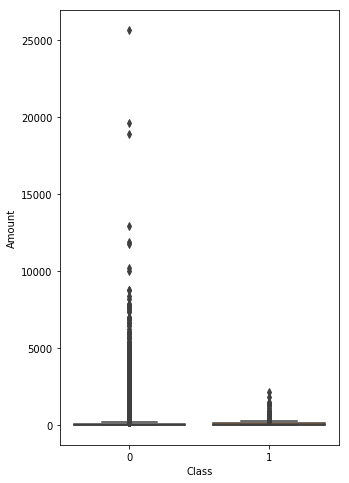

In [16]:
plt.figure(figsize=(5,8))
sns.boxplot(x='Class',y='Amount',data=data)

/opt/conda/envs/py3.6/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/envs/py3.6/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


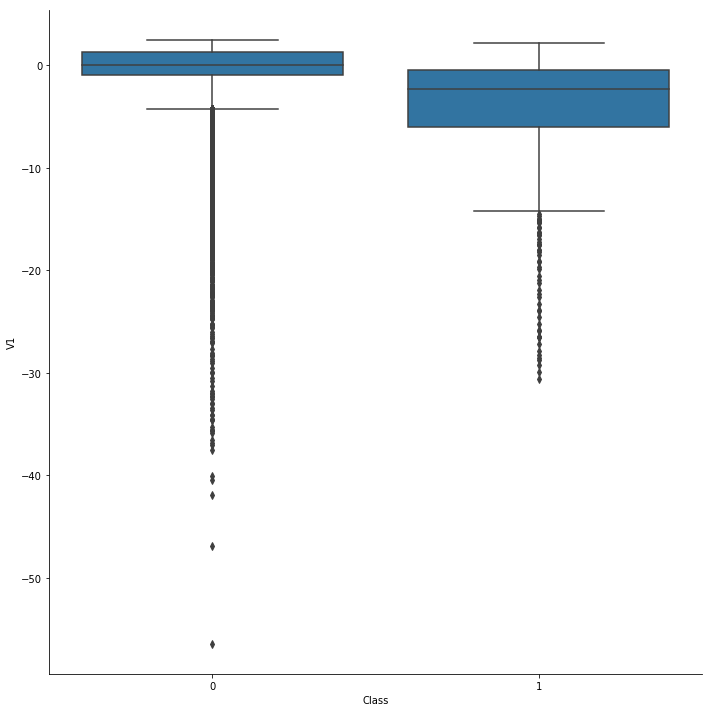

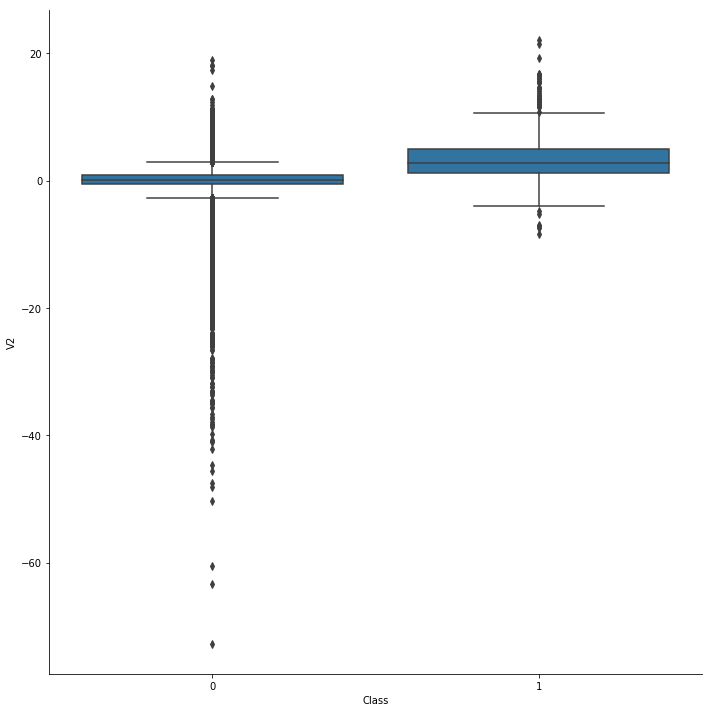

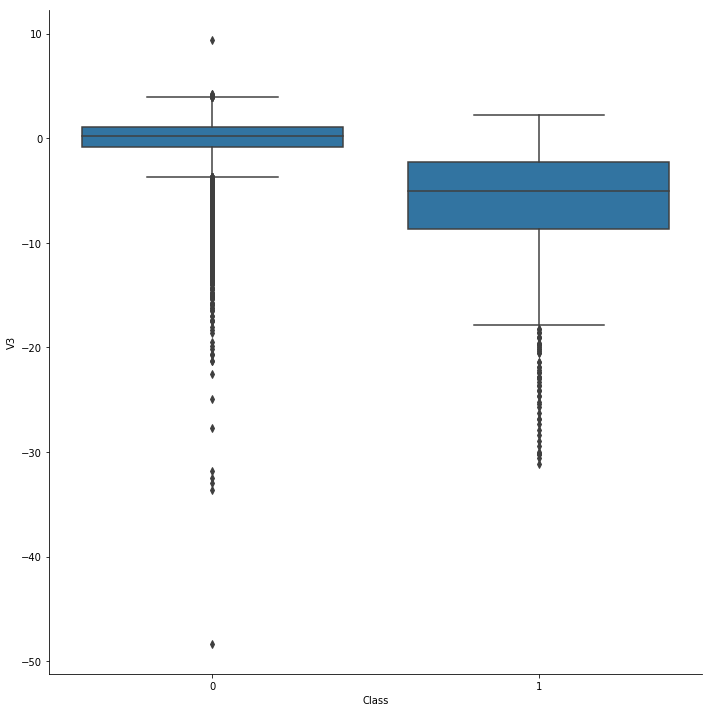

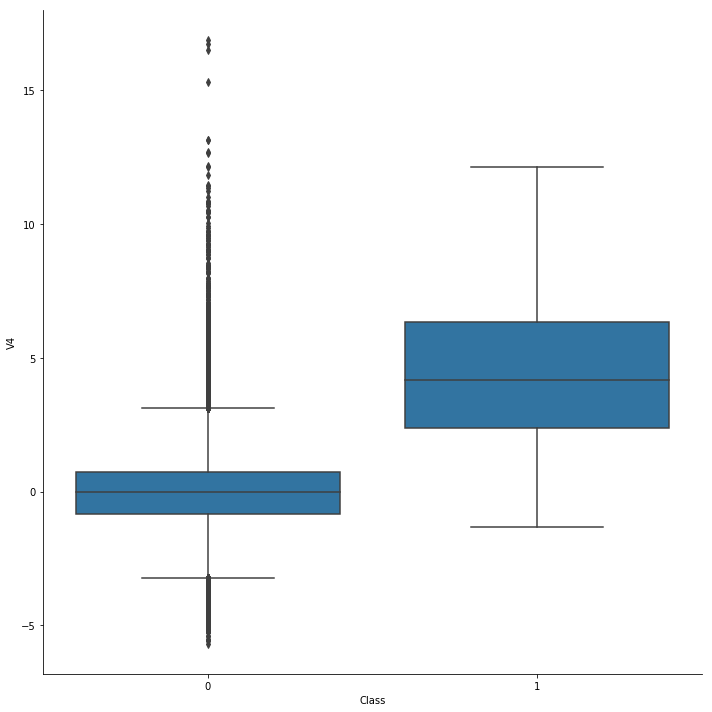

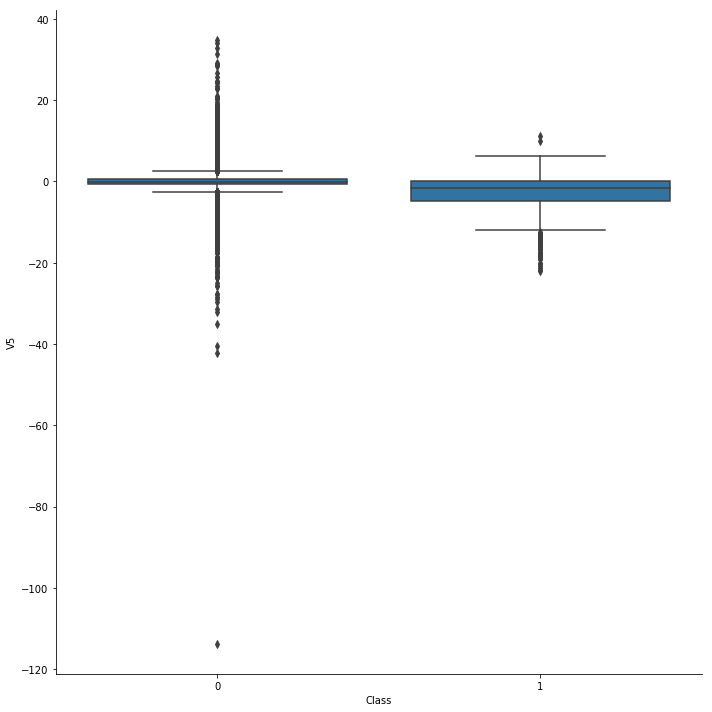

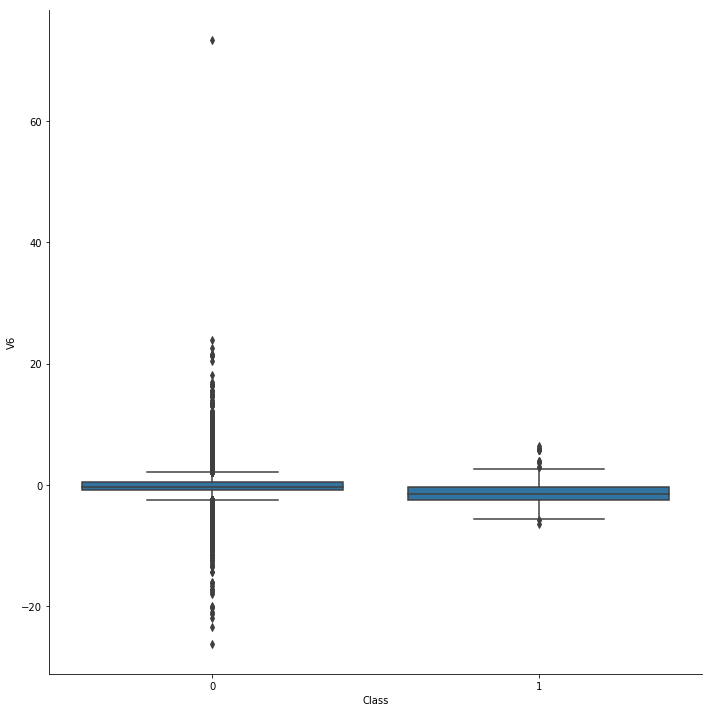

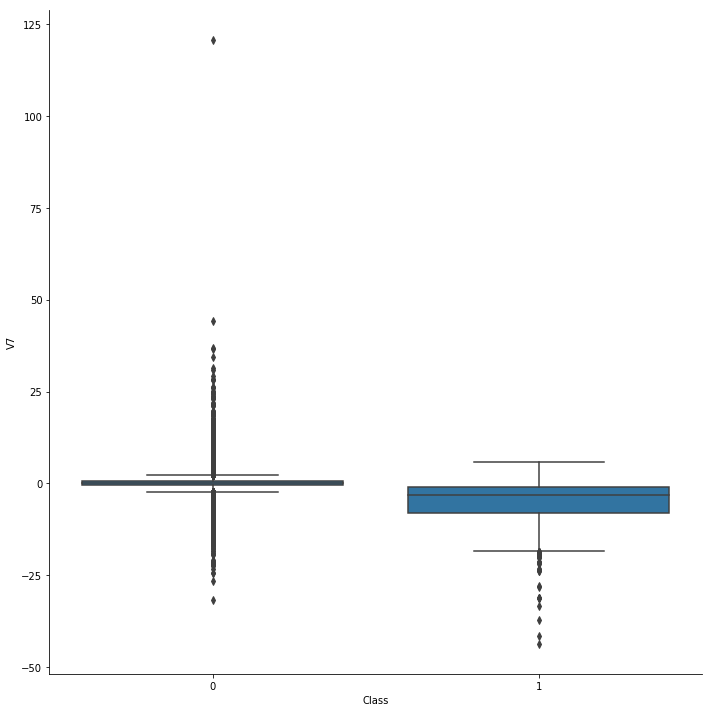

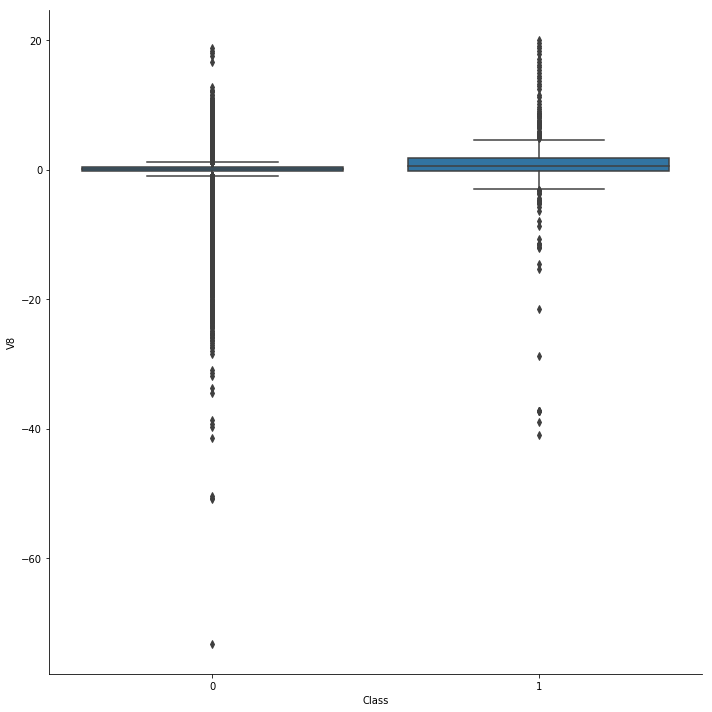

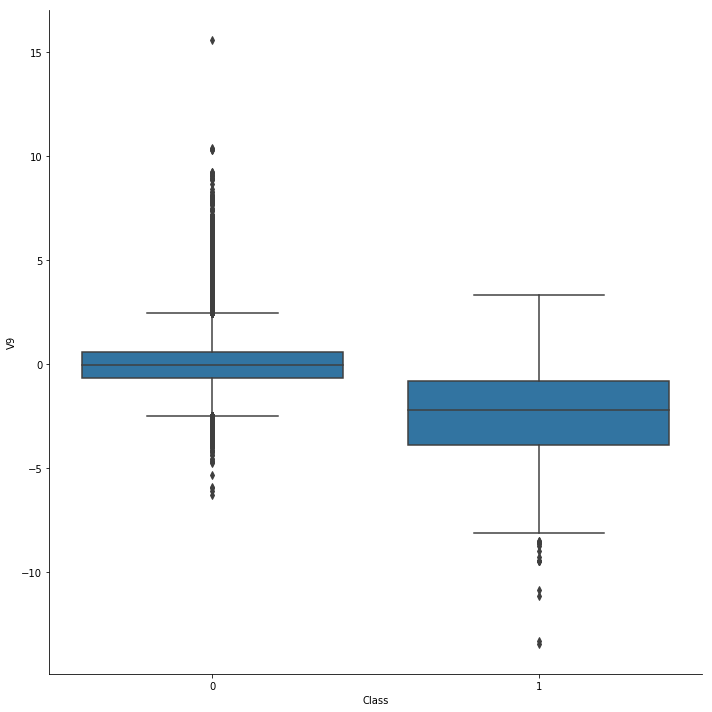

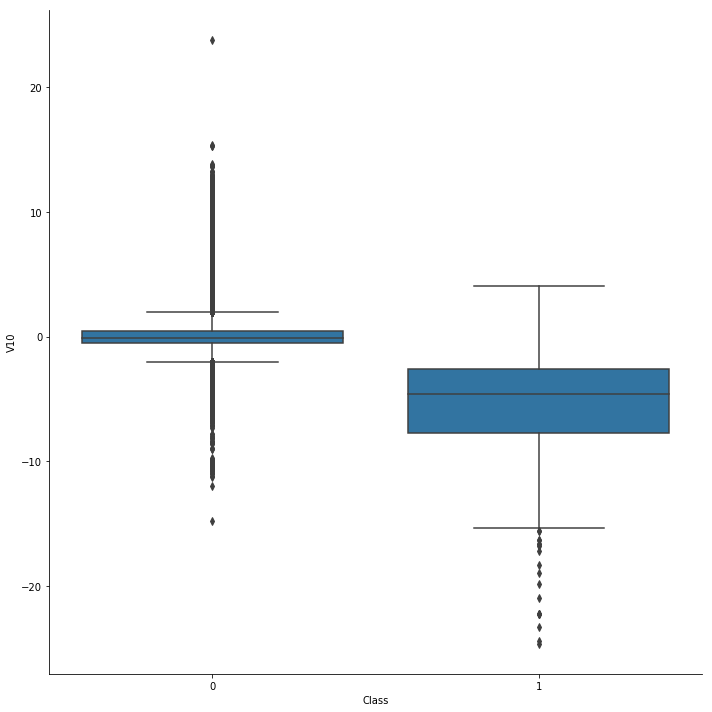

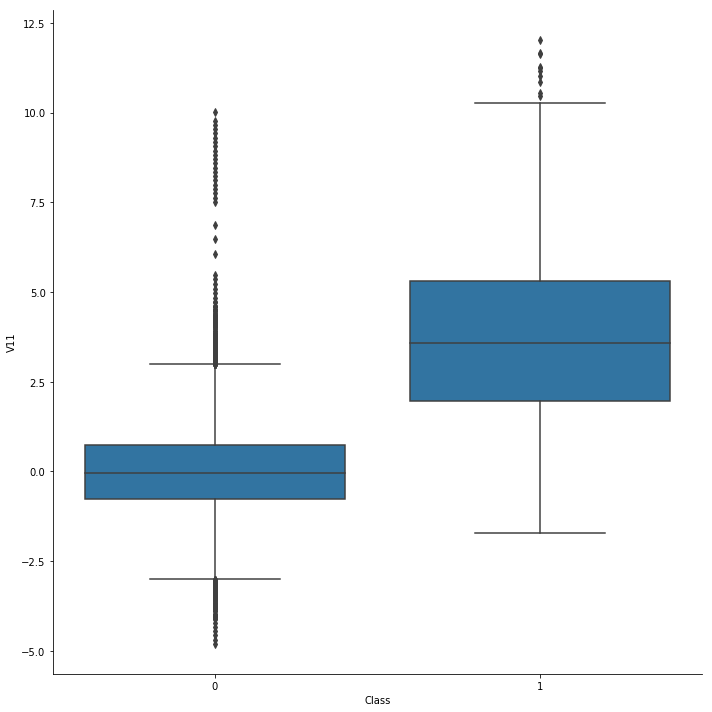

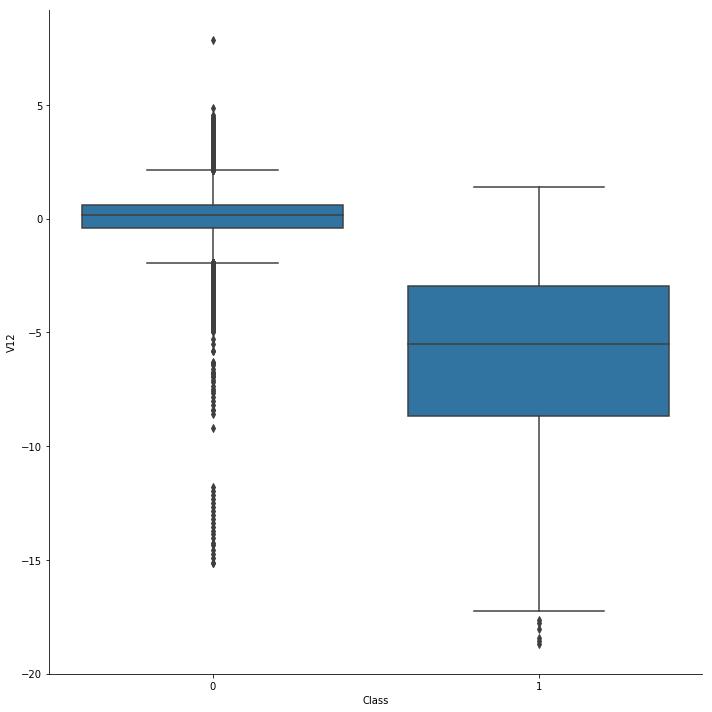

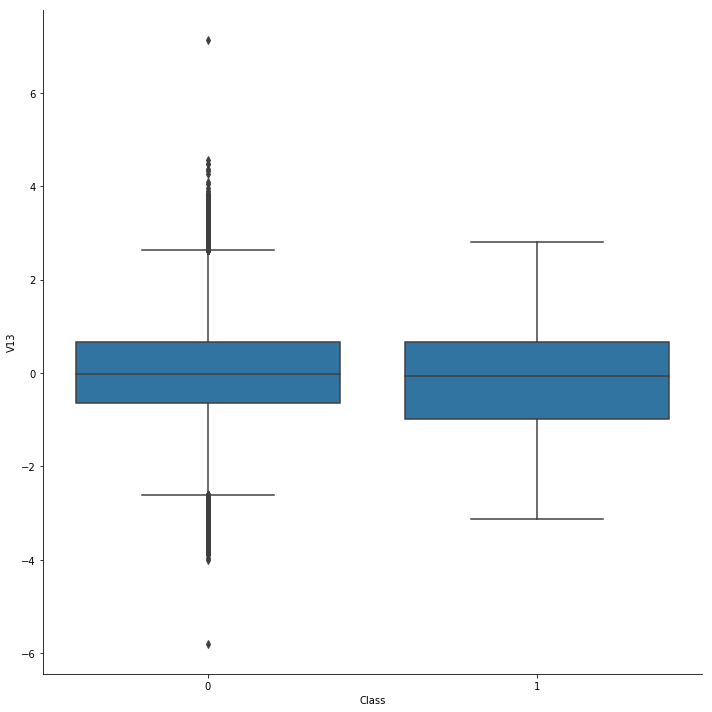

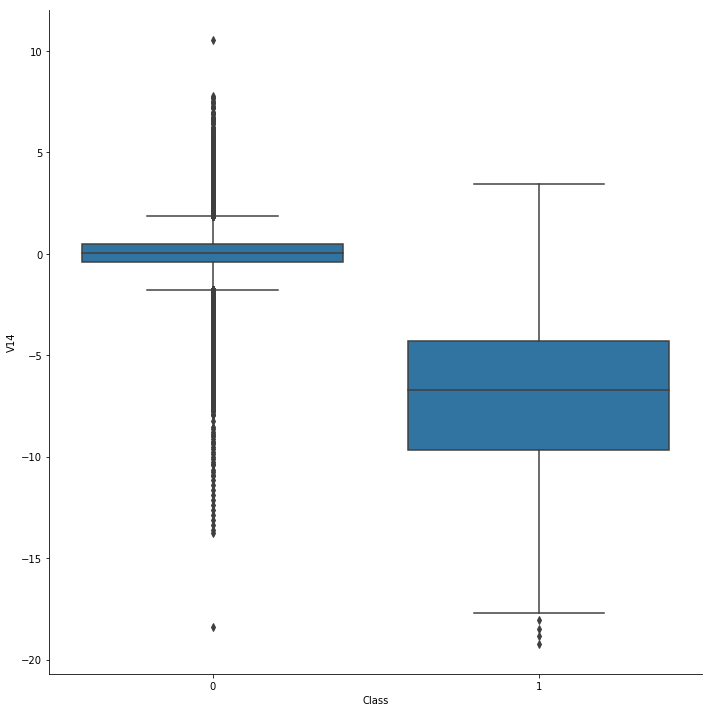

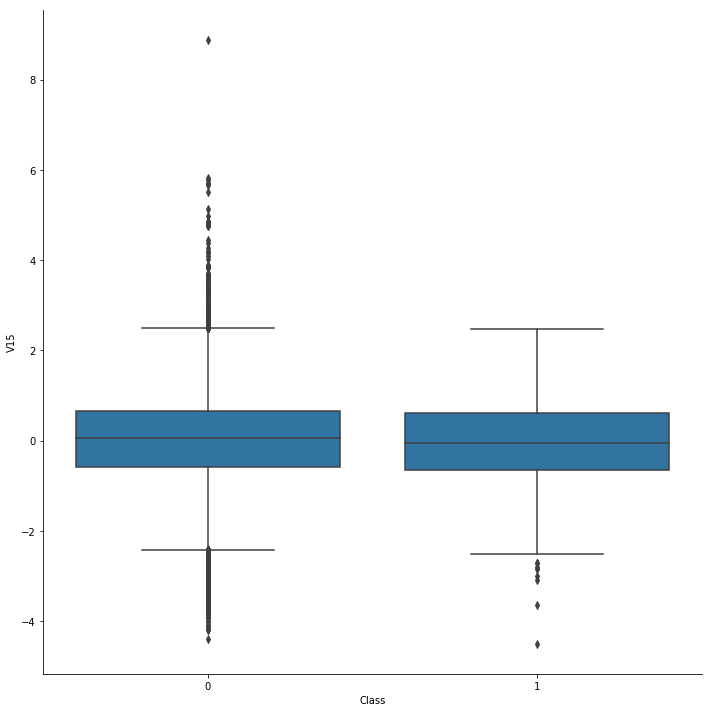

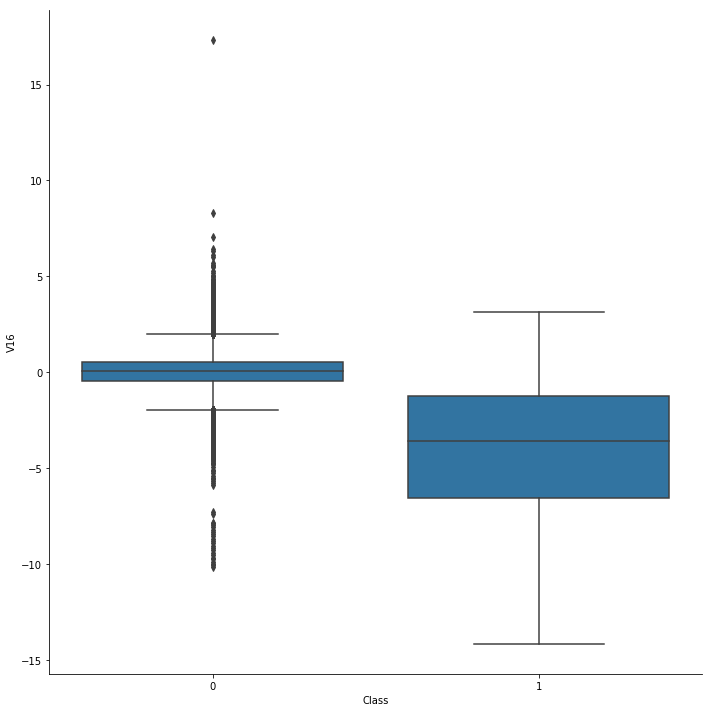

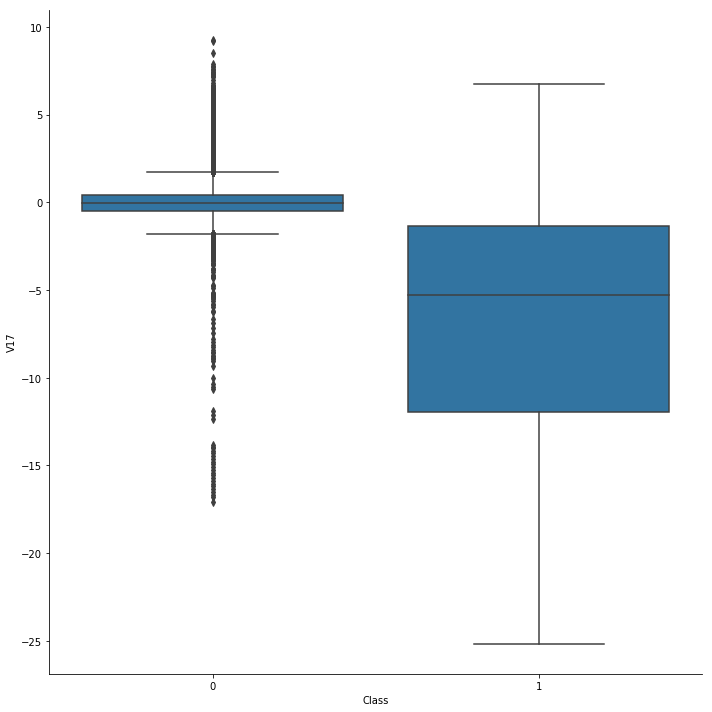

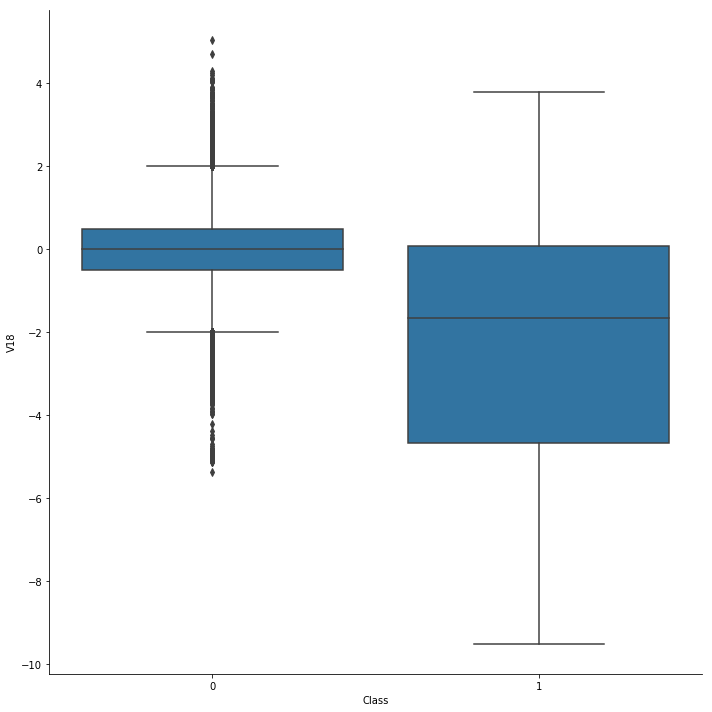

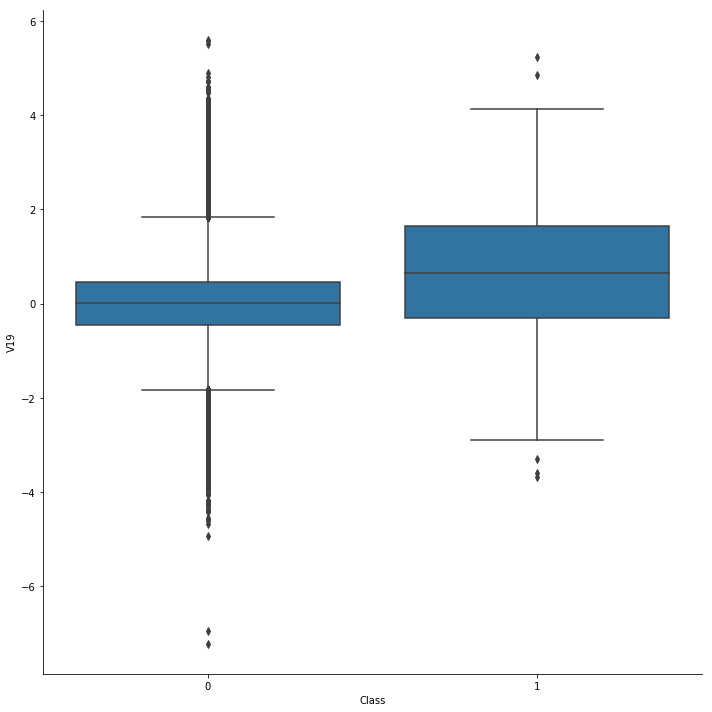

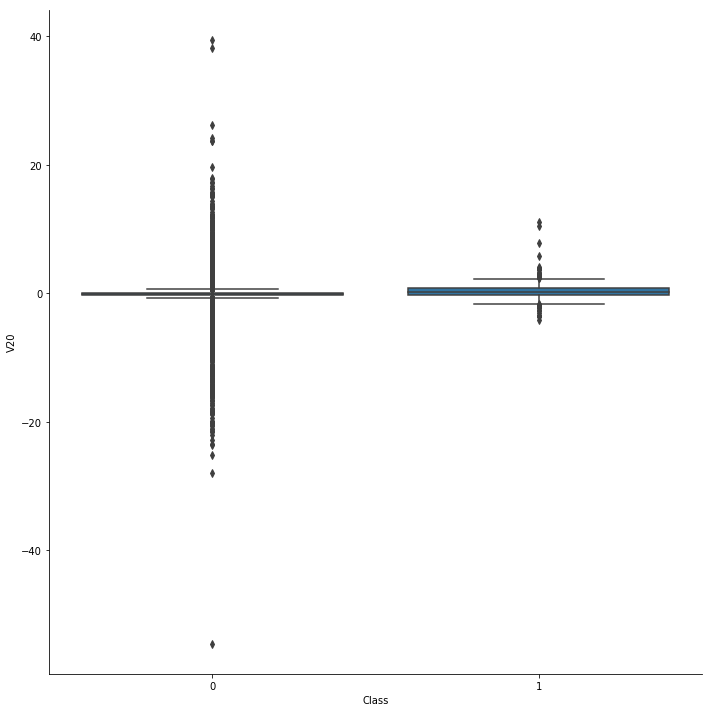

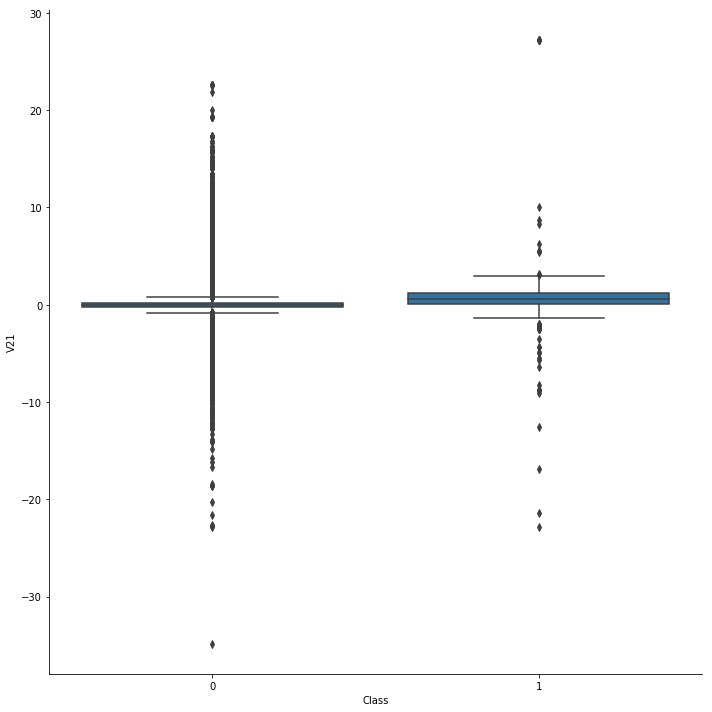

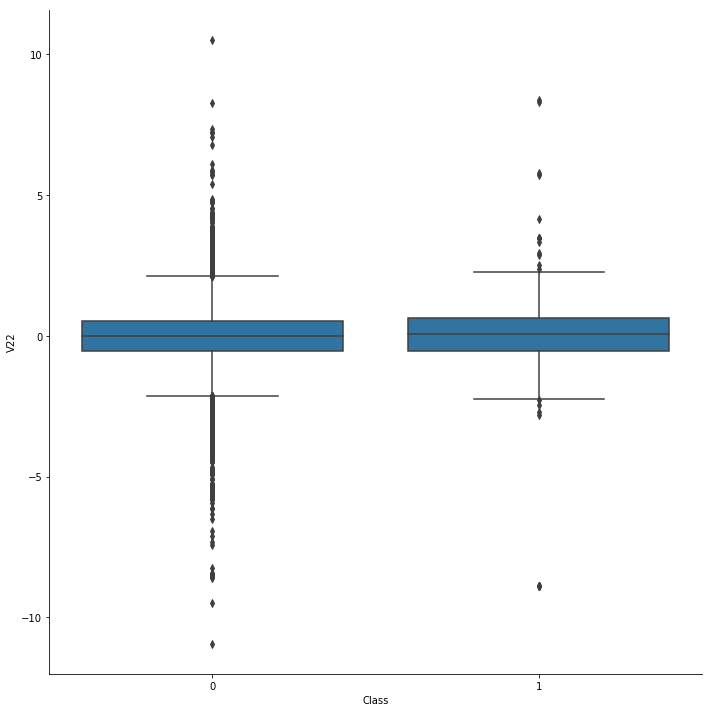

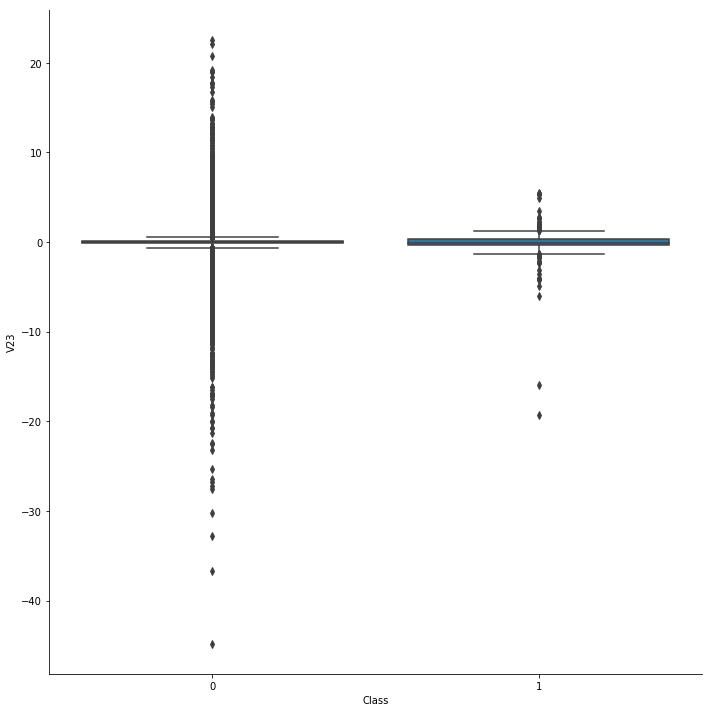

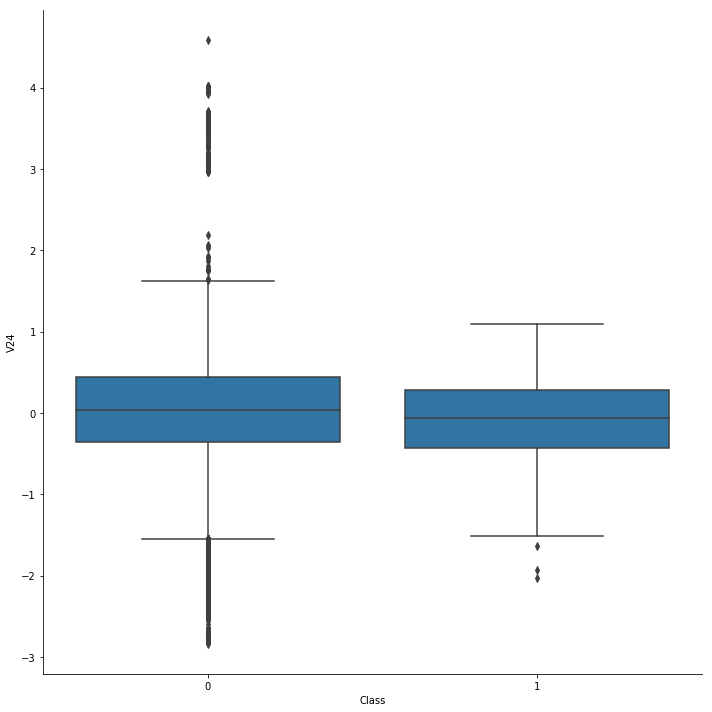

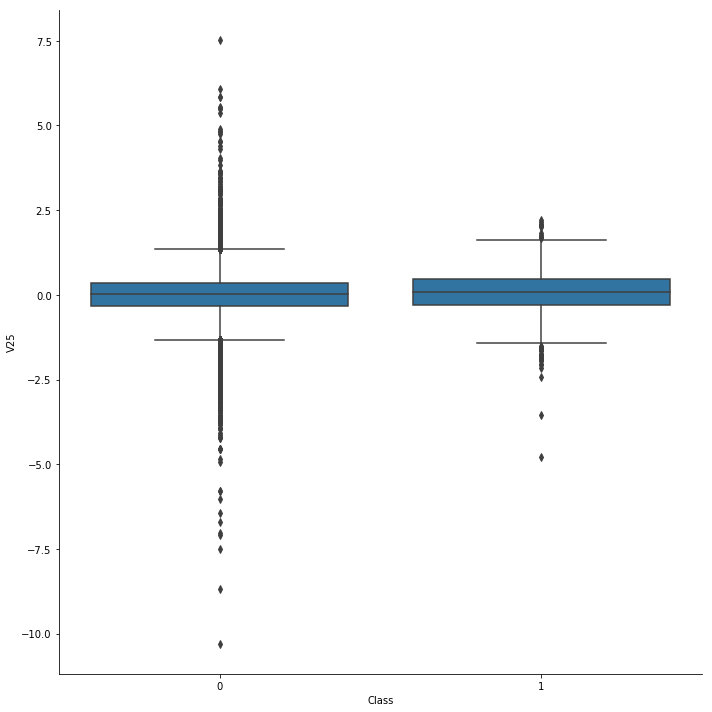

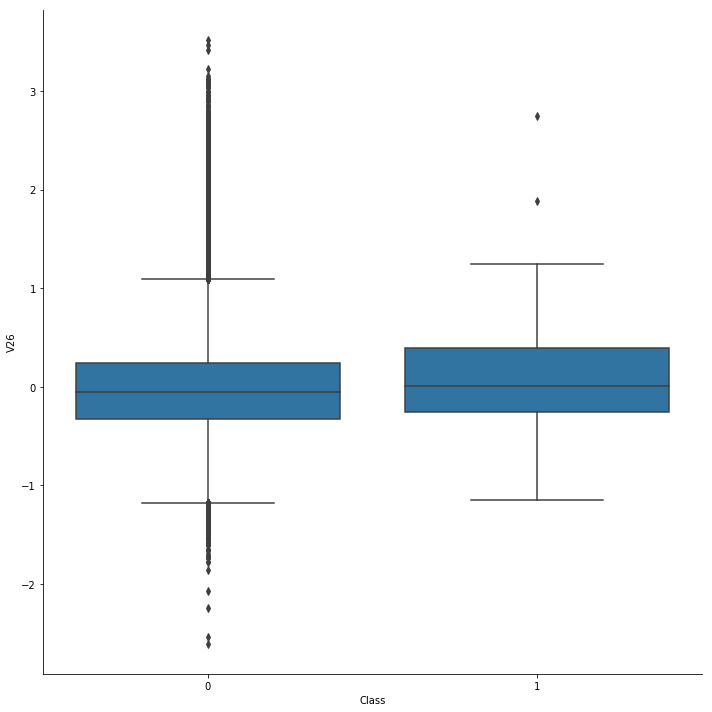

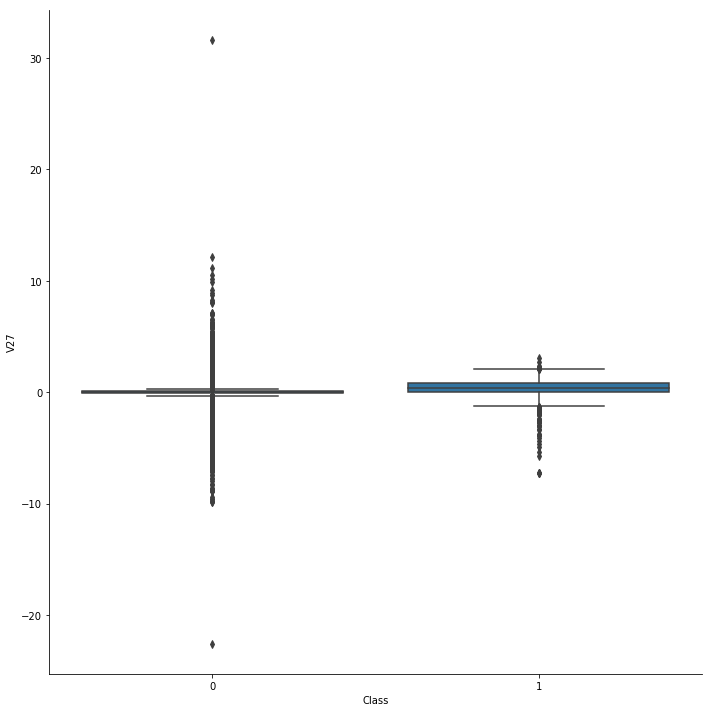

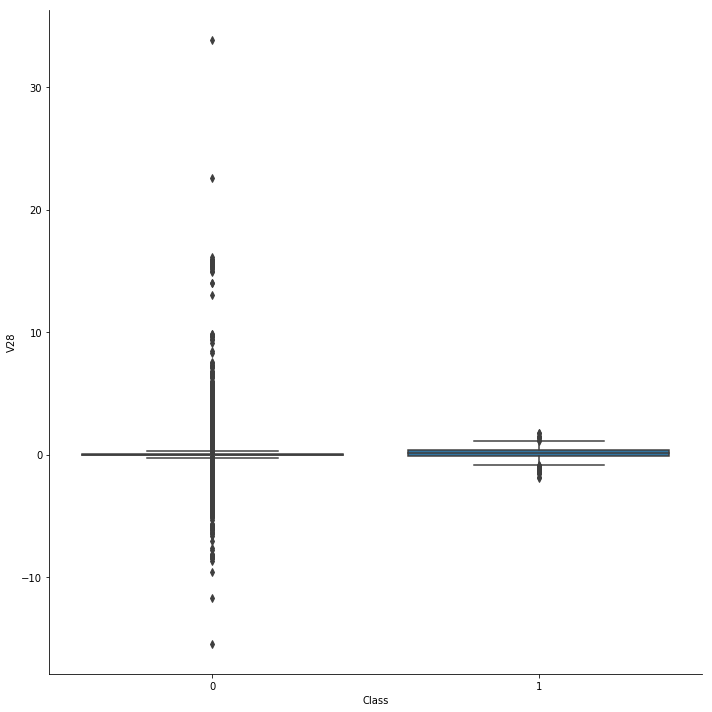

In [17]:
for i in range(1,29):
    fg=sns.FacetGrid(data=data,size=10)
    fg.map(sns.boxplot,'Class','V{}'.format(i))


 ##### Coclusion of boxplot: we saw in each of box plot for features, almost 30-40 % of data are overlapping thus classes cannot be well seperated.


#### Conclusion of univariate analysis: So as we saw in kde plot and  box plot , 30%-40% of data are overlapping , thus classes cannot be well sepearated with good accuracy by considering each feature alone.

#### BiVariate Analysis

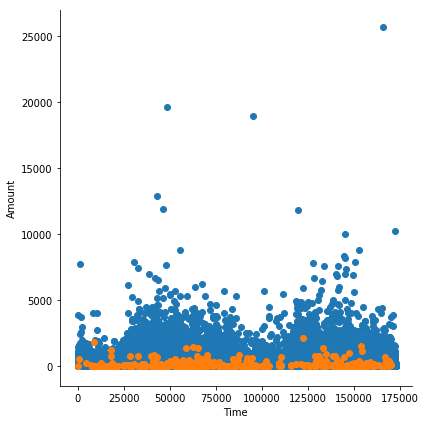

In [4]:
# Plotting scatter plots between some feaures as for 30 features , pair plot would be very large so we can just plot by picking features randomly

sns.FacetGrid(data,hue='Class',size=6)\
.map(plt.scatter,'Time','Amount')



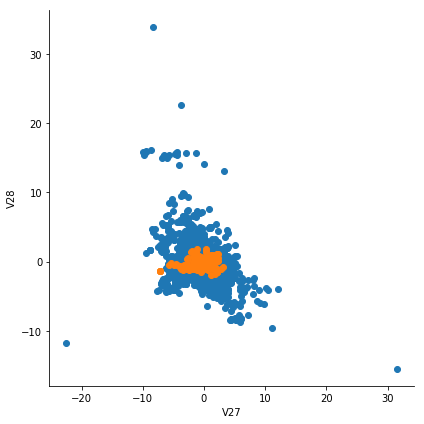

In [20]:
for i in range(1,28):
    for j in range(i+1,29):
        plt.close()
        sns.FacetGrid(data,hue='Class',size=6)\
        .map(plt.scatter,'V{}'.format(i),'V{}'.format(j))

#### Conclustion of EDA : we saw by univariate analysis and bivariate analysis , that it is very difficult to classify transactions(fraud or not ) by considering only 1 or 2 feature at a time with good accuracy. so may be considering all features we would be able to classify fraud transaction from non-fraud transaction.

## Task2

In [11]:
#calculating the simalirty metric
def similarity(a,b):
        alength=np.sqrt(sum([x**2 for x in a]))
        blength=np.sqrt(sum([x**2 for x in b]))
        return np.arccos(np.dot(a,b)/(alength*blength))

In [12]:
# calculation the ratio of class 
count_by_label=data['Class'].value_counts()
percent_label_0=(count_by_label[0]/count_by_label.sum())
percent_label_1=count_by_label[1]/count_by_label.sum()
print('{:.4f}'.format(percent_label_0))
print('{:.4f}'.format(percent_label_1))

0.9983
0.0017


In [13]:
#creating sample of 500 rows having  same class proportion as in complete dataset.
data_class0=data[data['Class']==0]
data_class1=data[data['Class']==1]
sample=data_class0.iloc[:99,:]
sample=sample.append(data_class1.iloc[0,:])

In [14]:
sample['Class'].value_counts()



0.0    99
1.0     1
Name: Class, dtype: int64

In [16]:

def top10(query_id,dataset):
    """
    this method finds top 10 similar transaction
    
    """
    li=[]
    result=[]
    for current_id in dataset.index: # looping over all the id in the dataset
        if(current_id==query_id): # skipping same row in dataset
            continue
        else:
            sim=similarity(dataset.loc[query_id],dataset.loc[current_id])
            li.append([dataset.loc[current_id,'Class'],current_id,sim]) # tuple of (class of current_id, current_id,similarity value  )
            
    
    df=pd.DataFrame(li,columns=['transaction_class','transaction','similarity'])
    df.sort_values(by='similarity',ascending=True,inplace=True)
    
    
    for index in df.index[0:10]:
        result.append((int(df.loc[index][0]),int(df.loc[index][1]),df.loc[index][2]))
        
    
    
    return result
    
def findSimilarity(data,sample):
    """
    This method find top 10 similar transaction for each transaction in the sample
    and returns dataframe.
    
    """
    li=[]
    for tid in sample.index:    # for 100 points
        l=[tid,data.loc[tid,'Class']]

        l.extend(top10(tid,data))
        li.append(l)

    result_df=pd.DataFrame(li,columns=['transaction','transaction_class','t1','t2','t3','t4','t5','t6','t7','t8','t9','t10'])

    return result_df

In [17]:
result=findSimilarity(data,sample)

/opt/conda/envs/py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in arccos
  """


In [18]:
result.head()

,transaction,transaction_class,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10
0,0,0,"(0, 2, 0.0237353343897)","(0, 51, 0.0359399147474)","(0, 164, 0.0376595073509)","(0, 3, 0.0397080188718)","(0, 4, 0.0528297430052)","(0, 89, 0.0580634641408)","(0, 20, 0.07567636464)","(0, 8, 0.0947485982844)","(0, 12, 0.0951097299117)","(0, 140, 0.0985190138579)"
1,1,0,"(0, 5, 0.768701164518)","(0, 20, 0.779776537022)","(0, 12, 0.779803367384)","(0, 2, 0.782530229667)","(0, 51, 0.783338707682)","(0, 164, 0.783909043148)","(0, 89, 0.784274288393)","(0, 3, 0.787375742997)","(0, 0, 0.788748000693)","(0, 150, 0.789548016068)"
2,2,0,"(0, 0, 0.0237353343897)","(0, 51, 0.0281979252757)","(0, 164, 0.0288121842797)","(0, 3, 0.0305620152798)","(0, 89, 0.0514065648037)","(0, 4, 0.056783952728)","(0, 20, 0.0684922264926)","(0, 12, 0.086483464085)","(0, 8, 0.0909512466903)","(0, 140, 0.093603662507)"
3,3,0,"(0, 2, 0.0305620152798)","(0, 51, 0.0389222661251)","(0, 164, 0.0396330152771)","(0, 0, 0.0397080188718)","(0, 89, 0.0561100545498)","(0, 4, 0.0598932093912)","(0, 20, 0.068138113654)","(0, 8, 0.0872259025822)","(0, 12, 0.0880750449304)","(0, 140, 0.0933725082431)"
4,4,0,"(0, 51, 0.0501182369133)","(0, 164, 0.0517404219726)","(0, 0, 0.0528297430052)","(0, 89, 0.0561541708028)","(0, 2, 0.056783952728)","(0, 3, 0.0598932093912)","(0, 20, 0.0679924634429)","(0, 140, 0.0828696492217)","(0, 150, 0.0847161155849)","(0, 12, 0.085201106819)"


In [19]:
result.tail()

,transaction,transaction_class,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10
95,95,0,"(0, 2677, 0.040226263837)","(0, 1641, 0.0431744779024)","(0, 159, 0.0432150827357)","(0, 129, 0.0436856175685)","(0, 192, 0.0447586823714)","(0, 230, 0.0451058668679)","(0, 593, 0.0467195270938)","(0, 843, 0.0486878052336)","(0, 124, 0.0507052739904)","(0, 344, 0.0512113405279)"
96,96,0,"(0, 84, 0.0710625044389)","(0, 318, 0.073790798285)","(0, 119, 0.0738733680443)","(0, 239, 0.0741257028008)","(0, 72, 0.077396514654)","(0, 268, 0.0789593229811)","(0, 341, 0.0794446861524)","(0, 81, 0.0799750108664)","(0, 842, 0.0804460532021)","(0, 434, 0.0805112868277)"
97,97,0,"(0, 714, 0.0408336523342)","(0, 645, 0.0413378158211)","(0, 217, 0.041950824106)","(0, 1154, 0.0424707933667)","(0, 401, 0.0425619058362)","(0, 975, 0.0434620297165)","(0, 1298, 0.0435382686224)","(0, 46841, 0.0437711420047)","(0, 485, 0.0438100697851)","(0, 1031, 0.0440519908616)"
98,98,0,"(0, 251, 0.0466450213338)","(0, 243, 0.0515992908774)","(0, 333, 0.0589672923647)","(0, 260, 0.0607472819025)","(0, 208, 0.0643456032789)","(0, 432, 0.0675092325415)","(0, 1300, 0.0678558786352)","(0, 266, 0.0682828909291)","(0, 42, 0.0683198210954)","(0, 906, 0.0683384731375)"
99,541,1,"(0, 460, 0.0166922986392)","(1, 8296, 0.0216110277492)","(1, 8615, 0.0217160642217)","(1, 9035, 0.021940381583)","(1, 8335, 0.0219718650971)","(1, 9252, 0.0220768521941)","(1, 9487, 0.0222108920308)","(1, 9509, 0.0222138461766)","(1, 9179, 0.0223664265243)","(1, 6717, 0.0225785468783)"
